<a href="https://colab.research.google.com/github/pranilthorat/almabetter-capstone-project-5-face-emotion-recognition/blob/main/GITHUB_capstone_project_5_face_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** 
# **Live Class Monitoring System(Face Emotion Recognition)**

# **Project Indroduction**
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. 
India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms.

 One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. 

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms.

 Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

# **Problem Statement**
We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.

# **What is Face Emotion Recognition ?**
This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.

# **Importing Libraries**

In [12]:
#install opencv_python
!pip install opencv_python

In [13]:
#importing all the libraries
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### CNN models ###
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.regularizers import l2
# from keras.optimizers import SGD, RMSprop
# from keras.utils import to_categorical
# from keras.layers.normalization import BatchNormalization
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from tensorflow.keras import layers
from keras.applications.inception_v3 import InceptionV3


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import sys, os
import pandas as pd
import numpy as np
import math
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
# from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot


# **Inspect the Data in First Look**

In [14]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
replace fer2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [15]:
# Image Reading
img_array=cv2.imread('/content/drive/MyDrive/WhatsApp Image 2022-02-01 at 19.24.38.jpeg')

In [16]:
#image array
img_array.shape

(960, 1280, 3)

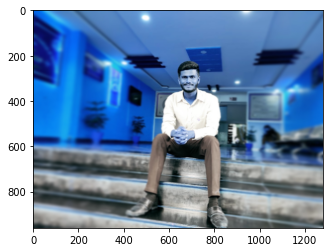

In [17]:
#show the image 
plt.imshow(img_array)

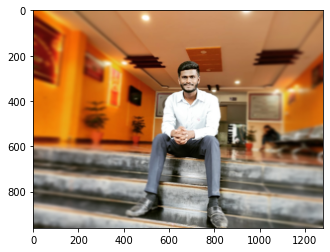

In [18]:
#changing the color rgb
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [19]:
!pip install deepface

In [20]:
#import deepface 
from deepface import DeepFace

In [21]:
#predict the image array 
predictions=DeepFace.analyze(img_array)

Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


In [22]:
# Analyze Image using DeepFace
from deepface import DeepFace
obj = DeepFace.analyze(img_path = "/content/drive/MyDrive/WhatsApp Image 2022-02-01 at 19.24.38.jpeg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

32  years old  indian   neutral   Man


In [23]:
#df=pd.read_csv('/content/drive/MyDrive/archive.zip')

In [24]:
#first five row and columns of dataset
#df.head()

In [25]:
#lable of different emotion
#emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [26]:
#pixel value of image
#math.sqrt(len(df.pixels[0].split(' ')))

In [27]:
# # size of the image: 48*48 pixels

# fig = pyplot.figure(1, (14, 14))

# k = 0
# for label in sorted(df.emotion.unique()):
#     for j in range(7):
#         px = df[df.emotion==label].pixels.iloc[k]
#         px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

#         k += 1
#         ax = pyplot.subplot(7, 7, k)
#         ax.imshow(px, cmap='gray')
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_title(emotion_label_to_text[label])
#         pyplot.tight_layout()